In [1]:
from wordle import Wordle

In [2]:
import wordle

In [3]:
import pandas as pd


In [4]:
import matplotlib

In [5]:
testSession = Wordle()


In [6]:
allwordspace = testSession.allWords.copy()

In [7]:
allwordspace.shape

(4276, 1)

In [8]:
allwordspace.drop_duplicates().shape

(4276, 1)

In [9]:
import swifter

/home/yian/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:

def testSolvingRounds( answer, initial_guess='raise' ): 
    wordleSession= Wordle()
    
    wordleSession.answer = answer
    
    guess = initial_guess
    score = ""
    
    for i in range(6):

        # print(guess)
        wordleSession.getGuess( guess )
        score = wordleSession.getScore( guess ) 
            
        if score == "22222":
            return i+1
    
        choice = wordleSession.updateChoices(guess, score ) 
        if len(choice) == 0:
            return -99999
    
        guess = wordleSession.genHint()

        
    # print( wordleSession.choiceSpace) 
    return -1
    





In [11]:
testSolvingRounds( "boxer")

-1

In [ ]:
allwordspace['stepsNeeded'] = allwordspace.words.swifter.apply( lambda x: testSolvingRounds( x )) 

Pandas Apply:  55%|█████████████▋           | 2347/4276 [04:52<07:40,  4.19it/s]

In [ ]:
(allwordspace['stepsNeeded']== allwordspace['stepsNeeded'].min()).sum()

<Axes: >

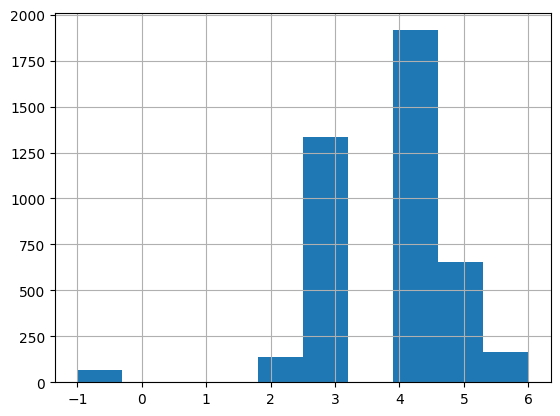

In [14]:
allwordspace['stepsNeeded'].hist()

In [31]:
allwordspace[allwordspace['stepsNeeded'] > 0]['stepsNeeded'].mean()

3.8718008922282228

In [32]:
1 - (allwordspace['stepsNeeded']== allwordspace['stepsNeeded'].min()).sum() / len( allwordspace ) 

0.9960243217960711

In [33]:
allwordspace.to_csv("summary.csv",index=False)

In [34]:
allwordspace = pd.read_csv("summary.csv")

In [35]:
allwordspace[allwordspace['stepsNeeded'] == -1]

,words,stepsNeeded
862,craze,-1
1416,foyer,-1
1923,joker,-1
2086,light,-1
2129,lolly,-1
2229,mater,-1
2279,might,-1
2315,molly,-1
2713,pitch,-1
2793,power,-1


In [36]:
def testSolvingRounds( answer, initial_guess='raise' ): 
    wordleSession= Wordle()
    
    wordleSession.answer = answer
    
    guess = initial_guess
    score = ""
    
    for i in range(7):

        # print(guess)
        wordleSession.getGuess( guess )
        score = wordleSession.getScore( guess ) 
            
        if score == "22222":
            return i+1
    
        choice = wordleSession.updateChoices(guess, score ) 
        if len(choice) == 0:
            return -99999
    
        guess = wordleSession.genHint()

        
    print( wordleSession.choiceSpace) 
    return -1

In [41]:
testSolvingRounds('pitch','polyp')

3